In [9]:
import json
import pandas as pd
from pymongo import GEOSPHERE
import src.functions as fun

# Let's connect with the new database:
from pymongo import MongoClient
conn = MongoClient("localhost:27017")
db = conn.get_database("ironhack")

#### Importing "spain_companies" json file to use it's offices:

In [10]:
f = open("data/spain_companies.json",)
data = json.load(f)
f.close()

In [11]:
len(data)

129

#### We have 129 possible offices in this file.

#### Which types of companies are in this files:

In [12]:
type_companies = pd.DataFrame(data)

In [13]:
type_companies["category_code"].unique()

array(['web', 'mobile', 'enterprise', 'software', 'advertising',
       'public_relations', 'games_video', 'ecommerce', None, 'legal',
       'other', 'search', 'consulting', 'social', 'network_hosting',
       'hospitality', 'finance', 'hardware', 'cleantech', 'fashion'],
      dtype=object)

#### We don't have any "design" companies so we will use in this case "games_video" because it's the same type of company that we are creating.

#### We had imported the "spain_companies" JSON files as a new collection in our MongoDB database to use it and now we define the geospacial index in that collection:

In [14]:
db.spain_companies.create_index([("location", GEOSPHERE)])

'location_2dsphere'

In [15]:
c = db.get_collection("spain_companies")

#### We had imported our defined functions in order to test each offices base on our criterias. Let's do it 10 by 10:

In [16]:
matrix1 = fun.weight_matrix(data, 0, 10)
pd_matrix1 = pd.DataFrame(matrix1)

In [19]:
pd_matrix1

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near
0,Negonation,40.463667,-3.749220,"{'type': 'Point', 'coordinates': [40.463667, -...",0,0,1,0,5,0,20,4,0
1,Fon,40.530724,-3.632687,"{'type': 'Point', 'coordinates': [40.530724, -...",0,0,1,2,2,1,20,9,1
2,eyeOS,41.385486,2.170287,"{'type': 'Point', 'coordinates': [41.3854855, ...",2,1,16,0,8,20,20,20,1
3,]project-open[,41.383182,2.163697,"{'type': 'Point', 'coordinates': [41.383182, 2...",2,1,14,0,8,20,20,20,1
4,Starfish Community Group,41.387917,2.169919,"{'type': 'Point', 'coordinates': [41.387917, 2...",0,4,14,0,8,20,20,20,1
5,Pixoo,40.463667,-3.749220,"{'type': 'Point', 'coordinates': [40.463667, -...",0,0,1,0,5,0,20,4,0
6,Buongiorno,40.448797,-3.669764,"{'type': 'Point', 'coordinates': [40.4487974, ...",0,1,2,0,7,1,20,20,3
7,Swotti,40.416741,-3.703250,"{'type': 'Point', 'coordinates': [40.416741, -...",0,3,15,1,7,20,20,20,2
8,AsesorSeguros,40.497716,-3.647842,"{'type': 'Point', 'coordinates': [40.497716, -...",0,0,1,0,6,0,20,0,0
9,Spain Holiday,36.732544,-4.381867,"{'type': 'Point', 'coordinates': [36.732544, -...",0,0,0,0,1,1,20,3,0


In [18]:
matrix2 = fun.weight_matrix(data, 10, 20)
pd_matrix2 = pd.DataFrame(matrix2)

In [20]:
pd_matrix2

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near
0,eRepublik,40.430940,-3.695290,"{'type': 'Point', 'coordinates': [40.43094, -3...",1,1,12,0,7,20,20,20,3
1,Trovit,41.388769,2.129949,"{'type': 'Point', 'coordinates': [41.388769, 2...",0,0,7,1,9,5,20,20,3
2,BMAT,41.406335,2.192023,"{'type': 'Point', 'coordinates': [41.406335, 2...",0,0,1,0,6,9,20,20,1
3,NotePub,40.416741,-3.703250,"{'type': 'Point', 'coordinates': [40.416741, -...",0,3,15,1,7,20,20,20,2
4,Futurlink,41.396553,2.189241,"{'type': 'Point', 'coordinates': [41.396553, 2...",0,0,2,0,6,12,20,20,0
5,Wuapi,41.387917,2.169919,"{'type': 'Point', 'coordinates': [41.387917, 2...",0,4,14,0,8,20,20,20,1
6,Ipoki,43.371491,-8.395970,"{'type': 'Point', 'coordinates': [43.371491, -...",0,0,0,0,0,18,20,20,1
7,FeedzZ,40.472227,-3.653252,"{'type': 'Point', 'coordinates': [40.4722272, ...",0,0,0,0,7,0,20,6,0
8,vLex,41.392852,2.168021,"{'type': 'Point', 'coordinates': [41.392852, 2...",2,2,15,0,8,20,20,20,1
9,Jobisjob,41.487094,2.077320,"{'type': 'Point', 'coordinates': [41.487094, 2...",0,0,0,0,1,0,20,0,0


In [21]:
matrix3 = fun.weight_matrix(data, 20, 30)
pd_matrix3 = pd.DataFrame(matrix3)

In [22]:
pd_matrix3

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near
0,GeoMe,41.387411,2.168518,"{'type': 'Point', 'coordinates': [41.387411, 2...",2,3,14,0,8,20,20,20,1
1,SYSCOM,40.553845,-3.899508,"{'type': 'Point', 'coordinates': [40.553845, -...",0,0,0,0,0,0,8,3,0
2,Next Limit,40.455219,-3.650703,"{'type': 'Point', 'coordinates': [40.455219, -...",0,0,1,0,7,0,20,15,0
3,Forvo,43.313558,-1.982036,"{'type': 'Point', 'coordinates': [43.3135579, ...",0,0,1,0,0,20,20,17,0
4,Veedia,40.456586,-3.647013,"{'type': 'Point', 'coordinates': [40.456586, -...",0,0,1,0,7,0,20,10,1
5,Cyloop,40.528845,-3.642991,"{'type': 'Point', 'coordinates': [40.5288449, ...",0,0,2,0,1,0,20,3,1
6,ipsojobs,41.406248,2.163194,"{'type': 'Point', 'coordinates': [41.406248, 2...",0,0,5,0,8,12,20,20,1
7,Solaiemes,40.382338,-3.773844,"{'type': 'Point', 'coordinates': [40.382338, -...",0,0,0,0,6,0,20,3,0
8,MEDDIA,41.401809,2.181565,"{'type': 'Point', 'coordinates': [41.4018094, ...",0,0,5,0,6,11,20,20,1
9,mmCHANNEL,40.456204,-3.813122,"{'type': 'Point', 'coordinates': [40.456204, -...",0,0,1,0,1,0,11,0,0


In [23]:
matrix4 = fun.weight_matrix(data, 30, 40)
pd_matrix4 = pd.DataFrame(matrix4)

In [24]:
pd_matrix4

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near
0,Videoplaza,40.459624,-3.692328,"{'type': 'Point', 'coordinates': [40.4596242, ...",0,0,3,0,7,3,20,20,1
1,AtelMedia,40.416741,-3.703250,"{'type': 'Point', 'coordinates': [40.416741, -...",0,3,15,1,7,20,20,20,2
2,Nuroa,41.391679,2.177571,"{'type': 'Point', 'coordinates': [41.3916792, ...",2,0,15,0,6,20,20,20,0
3,Festuc,41.387917,2.169919,"{'type': 'Point', 'coordinates': [41.387917, 2...",0,4,14,0,8,20,20,20,1
4,Bermi Labs,41.538143,2.452718,"{'type': 'Point', 'coordinates': [41.538143, 2...",0,0,0,0,1,4,20,11,3
5,Digital Assets Deployment,40.420460,-3.678121,"{'type': 'Point', 'coordinates': [40.42046, -3...",0,1,4,1,7,5,20,20,2
6,Daily Flat Rental,40.412323,-3.703248,"{'type': 'Point', 'coordinates': [40.412323, -...",0,5,14,1,8,20,20,20,1
7,3scale,41.406335,2.192023,"{'type': 'Point', 'coordinates': [41.406335, 2...",0,0,1,0,6,9,20,20,1
8,Daily Flat Rental,40.412323,-3.703248,"{'type': 'Point', 'coordinates': [40.412323, -...",0,5,14,1,8,20,20,20,1
9,3scale,41.406335,2.192023,"{'type': 'Point', 'coordinates': [41.406335, 2...",0,0,1,0,6,9,20,20,1


In [25]:
matrix5 = fun.weight_matrix(data, 40, 50)
pd_matrix5 = pd.DataFrame(matrix5)

In [26]:
pd_matrix5

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near
0,Zonablu Networks,38.349114,-0.489310,"{'type': 'Point', 'coordinates': [38.349114, -...",0,0,10,0,0,20,20,20,0
1,Uselabs,41.483253,2.331805,"{'type': 'Point', 'coordinates': [41.483253, 2...",0,0,0,0,1,0,8,0,0
2,Modo Marketing,39.640730,-0.421944,"{'type': 'Point', 'coordinates': [39.64073, -0...",0,0,0,0,0,0,1,0,0
3,Widgadget,41.392701,2.156538,"{'type': 'Point', 'coordinates': [41.392701, 2...",0,0,11,0,8,20,20,20,3
4,Spaceblue,28.962064,-13.556529,"{'type': 'Point', 'coordinates': [28.962064, -...",0,0,0,0,0,9,20,13,1
5,Olivos by Design,36.492548,-4.726890,"{'type': 'Point', 'coordinates': [36.492548, -...",0,0,0,0,0,5,8,1,0
6,Dilogs,41.442450,1.861916,"{'type': 'Point', 'coordinates': [41.4424496, ...",0,0,0,0,0,0,7,1,0
7,Adoos,40.432883,-3.816676,"{'type': 'Point', 'coordinates': [40.432883, -...",0,0,0,0,1,0,20,5,0
8,Vertical Social Networks,41.412590,2.143797,"{'type': 'Point', 'coordinates': [41.41259, 2....",0,0,1,0,9,1,20,8,0
9,Wysiwyg,40.449462,-3.707779,"{'type': 'Point', 'coordinates': [40.4494619, ...",0,1,3,0,7,3,20,20,0


In [27]:
matrix6 = fun.weight_matrix(data, 50, 60)
pd_matrix6 = pd.DataFrame(matrix6)

In [28]:
pd_matrix6

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near
0,Qapacity,41.395386,2.168131,"{'type': 'Point', 'coordinates': [41.3953856, ...",2,2,12,0,8,20,20,20,0
1,Tractis,41.376200,2.189732,"{'type': 'Point', 'coordinates': [41.3762002, ...",0,0,5,1,6,12,20,16,0
2,metoCube,40.420460,-3.678121,"{'type': 'Point', 'coordinates': [40.4204601, ...",0,1,4,1,7,5,20,20,2
3,pomeloTV,40.436777,-3.668504,"{'type': 'Point', 'coordinates': [40.4367771, ...",1,0,4,0,7,1,20,20,4
4,MediBANK,40.471853,-3.820331,"{'type': 'Point', 'coordinates': [40.4718534, ...",0,0,1,0,1,0,7,1,0
5,Neurotic,41.388738,2.175619,"{'type': 'Point', 'coordinates': [41.3887383, ...",2,3,13,0,6,20,20,20,1
6,Meytel,40.451136,-3.609665,"{'type': 'Point', 'coordinates': [40.4511364, ...",0,0,0,0,6,0,20,6,0
7,Heralsoft,43.522221,-5.665828,"{'type': 'Point', 'coordinates': [43.5222205, ...",0,0,0,0,1,1,20,8,1
8,doonde,41.406335,2.192023,"{'type': 'Point', 'coordinates': [41.4063346, ...",0,0,1,0,6,11,20,20,1
9,Striker Manager,41.406335,2.192023,"{'type': 'Point', 'coordinates': [41.4063346, ...",0,0,1,0,6,11,20,20,1


In [29]:
matrix7 = fun.weight_matrix(data, 60, 70)
pd_matrix7 = pd.DataFrame(matrix7)

In [30]:
pd_matrix7

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near
0,Tengaged,41.424123,2.163425,"{'type': 'Point', 'coordinates': [41.4241228, ...",0,0,0,0,8,2,20,20,2
1,GIM Geomatics,43.349218,-4.055165,"{'type': 'Point', 'coordinates': [43.3492183, ...",0,0,0,0,0,3,20,8,0
2,Busuu,40.422549,-3.683032,"{'type': 'Point', 'coordinates': [40.4225487, ...",1,1,7,1,7,6,20,20,4
3,tarifas24,40.430454,-3.710512,"{'type': 'Point', 'coordinates': [40.4304536, ...",0,0,10,0,7,20,20,20,3
4,Publicadigital,40.429194,-3.676894,"{'type': 'Point', 'coordinates': [40.4291944, ...",1,0,6,1,7,6,20,20,2
5,Fotohoo,41.387917,2.169919,"{'type': 'Point', 'coordinates': [41.387917, 2...",0,4,14,0,8,20,20,20,1
6,Cierzo Development,41.682083,-0.887420,"{'type': 'Point', 'coordinates': [41.6820833, ...",0,0,0,0,0,1,20,1,1
7,NetAsturias Internet,43.345901,-5.361750,"{'type': 'Point', 'coordinates': [43.3459015, ...",0,0,0,0,0,0,7,1,0
8,Entropy Computational Services,40.438087,-3.676064,"{'type': 'Point', 'coordinates': [40.4380872, ...",0,0,4,0,8,2,20,20,3
9,Social Gaming Platform,40.408627,-3.997038,"{'type': 'Point', 'coordinates': [40.4086268, ...",0,0,0,0,0,0,11,1,0


In [31]:
matrix8 = fun.weight_matrix(data, 70, 80)
pd_matrix8 = pd.DataFrame(matrix8)

In [32]:
pd_matrix8

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near
0,Sina ADI,43.405759,-5.806342,"{'type': 'Point', 'coordinates': [43.4057593, ...",0,0,0,0,1,0,11,7,0
1,Efebege,39.450211,-0.392465,"{'type': 'Point', 'coordinates': [39.4502107, ...",0,0,0,0,4,0,20,14,1
2,Unkasoft Advergaming,40.447436,-3.671492,"{'type': 'Point', 'coordinates': [40.4474363, ...",0,0,2,0,7,0,20,20,3
3,Monema Communications,42.463488,-2.447610,"{'type': 'Point', 'coordinates': [42.4634876, ...",0,0,0,0,0,8,20,20,1
4,Intergrid,41.380649,2.168719,"{'type': 'Point', 'coordinates': [41.3806494, ...",2,1,15,0,8,20,20,20,1
5,SevenClick,41.632954,-0.880990,"{'type': 'Point', 'coordinates': [41.6329538, ...",0,0,0,0,0,1,20,14,0
6,TravelCLICK,41.385064,2.173404,"{'type': 'Point', 'coordinates': [41.3850639, ...",2,2,15,0,8,20,20,20,1
7,Nexway,40.414299,-3.703307,"{'type': 'Point', 'coordinates': [40.4142986, ...",0,4,14,1,7,20,20,20,2
8,"DAEDALUS - Data, Decisions and Language",40.437254,-3.686665,"{'type': 'Point', 'coordinates': [40.4372542, ...",0,0,7,0,8,6,20,20,2
9,Gennio,40.434694,-3.678283,"{'type': 'Point', 'coordinates': [40.4346935, ...",1,0,7,0,7,4,20,20,3


In [33]:
matrix9 = fun.weight_matrix(data, 80, 90)
pd_matrix9 = pd.DataFrame(matrix9)

In [34]:
pd_matrix9

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near
0,YouAre,37.338472,-5.838669,"{'type': 'Point', 'coordinates': [37.3384716, ...",0,0,0,0,1,1,20,8,0
1,Tata Communications,41.625290,-4.726129,"{'type': 'Point', 'coordinates': [41.6252901, ...",0,0,0,0,1,0,13,0,1
2,Zankyou,40.607090,-3.691275,"{'type': 'Point', 'coordinates': [40.6070897, ...",0,0,0,0,1,0,5,0,0
3,alteregoweb,42.267498,2.960840,"{'type': 'Point', 'coordinates': [42.2674977, ...",0,0,0,0,0,6,20,8,0
4,Ohlala! Mobile,40.432898,-3.649695,"{'type': 'Point', 'coordinates': [40.4328978, ...",0,0,0,0,7,0,20,20,2
5,Comunitae,40.490511,-3.703340,"{'type': 'Point', 'coordinates': [40.4905109, ...",0,0,1,0,6,0,20,3,1
6,Velneo,42.163872,-8.610570,"{'type': 'Point', 'coordinates': [42.1638716, ...",0,0,0,0,0,3,13,6,0
7,Nubesis,39.548182,-0.461439,"{'type': 'Point', 'coordinates': [39.5481824, ...",0,0,0,0,3,0,11,2,0
8,Mobiquus,41.432241,2.163444,"{'type': 'Point', 'coordinates': [41.4322413, ...",1,0,0,0,8,2,20,20,2
9,Seguronline,40.465492,-3.691617,"{'type': 'Point', 'coordinates': [40.4654916, ...",0,1,2,0,8,0,20,20,0


In [35]:
matrix10 = fun.weight_matrix(data, 90, 100)
pd_matrix10 = pd.DataFrame(matrix10)

In [36]:
pd_matrix10

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near
0,DOMODESK,39.461268,-0.398346,"{'type': 'Point', 'coordinates': [39.4612679, ...",0,0,0,0,4,4,20,20,2
1,Hudson International Properties,36.478834,-4.995147,"{'type': 'Point', 'coordinates': [36.4788337, ...",0,0,2,0,0,10,20,8,0
2,ISID,40.435375,-3.686534,"{'type': 'Point', 'coordinates': [40.4353746, ...",1,1,7,0,7,5,20,20,3
3,Doctoralia,41.387917,2.169919,"{'type': 'Point', 'coordinates': [41.387917, 2...",0,4,14,0,8,20,20,20,1
4,Fiabee,41.432088,2.142903,"{'type': 'Point', 'coordinates': [41.4320885, ...",0,0,0,2,8,0,20,3,0
5,Sowre,41.394367,2.149195,"{'type': 'Point', 'coordinates': [41.3943671, ...",0,0,5,0,9,14,20,20,3
6,Openbravo,41.393532,2.166078,"{'type': 'Point', 'coordinates': [41.3935324, ...",2,1,14,0,8,20,20,20,1
7,IMASTE,40.427245,-3.675517,"{'type': 'Point', 'coordinates': [40.4272451, ...",0,1,5,1,7,4,20,20,3
8,iwannagothere,40.453955,-3.700356,"{'type': 'Point', 'coordinates': [40.4539547, ...",0,0,4,0,7,4,20,20,0
9,Tuenti Technologies,40.415824,-3.696277,"{'type': 'Point', 'coordinates': [40.4158236, ...",0,4,16,1,3,20,20,20,3


In [37]:
matrix11 = fun.weight_matrix(data, 100, 110)
pd_matrix11 = pd.DataFrame(matrix11)

In [38]:
pd_matrix11

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near
0,PowerVote,40.434694,-3.678283,"{'type': 'Point', 'coordinates': [40.4346935, ...",1,0,7,0,7,4,20,20,3
1,Dinahosting,42.888188,-8.547048,"{'type': 'Point', 'coordinates': [42.8881883, ...",0,0,0,0,1,15,20,11,0
2,Arroba,40.555819,-3.897694,"{'type': 'Point', 'coordinates': [40.5558192, ...",0,0,0,0,0,0,11,2,0
3,Web Piston,40.458178,-3.684589,"{'type': 'Point', 'coordinates': [40.458178, -...",0,1,5,0,7,2,20,20,1
4,Bidoo,41.536822,2.102923,"{'type': 'Point', 'coordinates': [41.5368215, ...",0,0,1,0,0,1,20,20,0
5,ASPgems,40.416597,-3.699267,"{'type': 'Point', 'coordinates': [40.4165967, ...",0,5,15,1,8,20,20,20,2
6,*faircompanies,41.380327,2.176226,"{'type': 'Point', 'coordinates': [41.3803265, ...",0,1,14,0,6,20,20,20,0
7,quimica_visual,41.372303,2.156075,"{'type': 'Point', 'coordinates': [41.3723033, ...",0,0,4,0,8,14,20,20,0
8,JamesList,36.509937,-4.886352,"{'type': 'Point', 'coordinates': [36.5099367, ...",0,0,1,0,0,12,20,20,0
9,Virgin Play,40.427308,-3.689512,"{'type': 'Point', 'coordinates': [40.4273082, ...",1,2,12,1,7,19,20,20,3


In [39]:
matrix12 = fun.weight_matrix(data, 110, 120)
pd_matrix12 = pd.DataFrame(matrix12)

In [40]:
pd_matrix12

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near
0,Hostarting,39.872512,-4.021030,"{'type': 'Point', 'coordinates': [39.8725119, ...",0,0,0,0,0,1,20,0,0
1,U-Play Studios,41.406335,2.192023,"{'type': 'Point', 'coordinates': [41.4063346, ...",0,0,1,0,6,9,20,20,1
2,Iris Experience,41.392701,2.156538,"{'type': 'Point', 'coordinates': [41.3927014, ...",0,0,11,0,8,20,20,20,3
3,iContainers,41.376304,2.175271,"{'type': 'Point', 'coordinates': [41.3763043, ...",0,0,11,0,6,20,20,20,1
4,Undead Code Studios,40.636710,-3.998048,"{'type': 'Point', 'coordinates': [40.6367104, ...",0,0,2,0,0,0,20,6,1
5,Cokidoo,42.899516,-8.508945,"{'type': 'Point', 'coordinates': [42.8995162, ...",0,0,0,0,1,1,2,0,0
6,efectividads,39.486231,-0.357419,"{'type': 'Point', 'coordinates': [39.4862314, ...",0,0,0,0,4,3,20,9,0
7,IntraWorlds,40.426858,-3.701524,"{'type': 'Point', 'coordinates': [40.426858, -...",1,1,16,0,7,20,20,20,2
8,Chicisimo,43.264499,-2.930832,"{'type': 'Point', 'coordinates': [43.264499, -...",0,0,4,3,1,20,20,20,0
9,Netsize,40.416741,-3.703250,"{'type': 'Point', 'coordinates': [40.4167413, ...",0,3,15,1,8,20,20,20,2


In [41]:
matrix13 = fun.weight_matrix(data, 120, 129)
pd_matrix13 = pd.DataFrame(matrix13)

In [42]:
pd_matrix13

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near
0,Tagmore Solutions,40.422692,-3.688307,"{'type': 'Point', 'coordinates': [40.4226918, ...",1,2,12,1,7,17,20,20,3
1,Taxi Fares app,40.424459,-3.699095,"{'type': 'Point', 'coordinates': [40.4244585, ...",1,4,17,0,7,20,20,20,2
2,ticketea,40.445515,-3.706176,"{'type': 'Point', 'coordinates': [40.4455155, ...",0,0,2,0,7,5,20,20,1
3,I6NET,40.434287,-3.705676,"{'type': 'Point', 'coordinates': [40.4342873, ...",0,0,6,0,7,17,20,20,2
4,cost4travel,40.452871,-3.614939,"{'type': 'Point', 'coordinates': [40.4528711, ...",0,0,0,0,7,0,20,5,0
5,Genasys,40.416184,-3.698873,"{'type': 'Point', 'coordinates': [40.4161835, ...",0,4,15,1,8,20,20,20,2
6,Teambox,41.406335,2.192023,"{'type': 'Point', 'coordinates': [41.4063346, ...",0,0,1,0,6,10,20,20,1
7,BuyVIP,40.416741,-3.703250,"{'type': 'Point', 'coordinates': [40.4167413, ...",0,3,15,1,8,20,20,20,2
8,ITERNOVA,40.340133,-1.105961,"{'type': 'Point', 'coordinates': [40.3401332, ...",0,0,0,0,0,3,20,5,0


#### We concatenate every dataframe that we have in order to have a martix with the whole 129 offices and their criteria points:

In [43]:
frames = [pd_matrix1, pd_matrix2, pd_matrix3, pd_matrix4, pd_matrix5, pd_matrix6, pd_matrix7, pd_matrix8, pd_matrix9, pd_matrix10, pd_matrix11, pd_matrix12, pd_matrix13]
final_df = pd.concat(frames)

In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 8
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  129 non-null    object 
 1   latitude              129 non-null    float64
 2   longitude             129 non-null    float64
 3   location              129 non-null    object 
 4   videogames_near       129 non-null    int64  
 5   1mcompanies_near      129 non-null    int64  
 6   starbucks_near        129 non-null    int64  
 7   airports_near         129 non-null    int64  
 8   basket_stad_near      129 non-null    int64  
 9   vegans_near           129 non-null    int64  
 10  schools_near          129 non-null    int64  
 11  nightclubs_near       129 non-null    int64  
 12  dog_hairdresser_near  129 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 14.1+ KB


In [52]:
final_df = final_df.reset_index(drop = True)

#### The we count how many of this criteria are achieved and we wight each criteria base on this weight matrix:


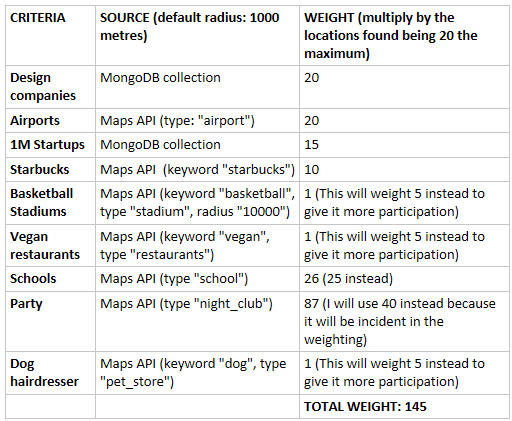

#### We count each non-zero column:

In [53]:
columns = ["videogames_near", "1mcompanies_near", "starbucks_near", "airports_near", "basket_stad_near", "vegans_near", "schools_near", "nightclubs_near", "dog_hairdresser_near"]

final_df["conditions"] = final_df[columns].astype(bool).sum(axis=1)

In [55]:
final_df.head(2)

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near,conditions
0,Negonation,40.463667,-3.749220,"{'type': 'Point', 'coordinates': [40.463667, -...",0,0,1,0,5,0,20,4,0,4
1,Fon,40.530724,-3.632687,"{'type': 'Point', 'coordinates': [40.530724, -...",0,0,1,2,2,1,20,9,1,7


#### And then we get each office weight points:

In [56]:
final_df["final_score"] = (final_df["videogames_near"] * 20) + (final_df["1mcompanies_near"] * 15) + (final_df["starbucks_near"] * 10) + (final_df["airports_near"] * 20) + (final_df["basket_stad_near"] * 5) + (final_df["vegans_near"] * 5) + (final_df["schools_near"] * 25) + (final_df["nightclubs_near"] * 40) + (final_df["dog_hairdresser_near"] * 5)

In [57]:
final_df.head(2)

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near,conditions,final_score
0,Negonation,40.463667,-3.749220,"{'type': 'Point', 'coordinates': [40.463667, -...",0,0,1,0,5,0,20,4,0,4,695
1,Fon,40.530724,-3.632687,"{'type': 'Point', 'coordinates': [40.530724, -...",0,0,1,2,2,1,20,9,1,7,930


#### Now let's order it, first, by amount of non-zero criteria columns and then, by points:

In [59]:
final_df = final_df.sort_values(by=["conditions", "final_score"], ascending = False)

#### Now, we select the options our 9 requierenments for the office:

In [63]:
final_df[final_df["conditions"] == 9]

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near,conditions,final_score
109,Virgin Play,40.427308,-3.689512,"{'type': 'Point', 'coordinates': [40.4273082, ...",1,2,12,1,7,19,20,20,3,9,1635
120,Tagmore Solutions,40.422692,-3.688307,"{'type': 'Point', 'coordinates': [40.4226918, ...",1,2,12,1,7,17,20,20,3,9,1625
62,Busuu,40.422549,-3.683032,"{'type': 'Point', 'coordinates': [40.4225487, ...",1,1,7,1,7,6,20,20,4,9,1510


#### We had 3 options that fullfill the whole 9 criterias... So we will choose our best option based on our defined score:

In [64]:
final_df[final_df["name"] == "Virgin Play"]

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near,conditions,final_score
109,Virgin Play,40.427308,-3.689512,"{'type': 'Point', 'coordinates': [40.4273082, ...",1,2,12,1,7,19,20,20,3,9,1635


## Now we have our brand new office:
### Latitude: 40.427308
### Longitude: -3.689512

#### And let's export our list of criterias and scores in a JSON file to keep it safe:

In [67]:
final_df = final_df.reset_index(drop = True)

In [68]:
final_df.to_json("data/selections.json", orient="records")

In [69]:
final_df

,name,latitude,longitude,location,videogames_near,1mcompanies_near,starbucks_near,airports_near,basket_stad_near,vegans_near,schools_near,nightclubs_near,dog_hairdresser_near,conditions,final_score
0,Virgin Play,40.427308,-3.689512,"{'type': 'Point', 'coordinates': [40.4273082, ...",1,2,12,1,7,19,20,20,3,9,1635
1,Tagmore Solutions,40.422692,-3.688307,"{'type': 'Point', 'coordinates': [40.4226918, ...",1,2,12,1,7,17,20,20,3,9,1625
2,Busuu,40.422549,-3.683032,"{'type': 'Point', 'coordinates': [40.4225487, ...",1,1,7,1,7,6,20,20,4,9,1510
3,ASPgems,40.416597,-3.699267,"{'type': 'Point', 'coordinates': [40.4165967, ...",0,5,15,1,8,20,20,20,2,8,1695
4,Taxi Fares app,40.424459,-3.699095,"{'type': 'Point', 'coordinates': [40.4244585, ...",1,4,17,0,7,20,20,20,2,8,1695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Dilogs,41.442450,1.861916,"{'type': 'Point', 'coordinates': [41.4424496, ...",0,0,0,0,0,0,7,1,0,2,215
125,NetAsturias Internet,43.345901,-5.361750,"{'type': 'Point', 'coordinates': [43.3459015, ...",0,0,0,0,0,0,7,1,0,2,215
126,Uselabs,41.483253,2.331805,"{'type': 'Point', 'coordinates': [41.483253, 2...",0,0,0,0,1,0,8,0,0,2,205
127,Zankyou,40.607090,-3.691275,"{'type': 'Point', 'coordinates': [40.6070897, ...",0,0,0,0,1,0,5,0,0,2,130
